## Classifying Emotions in an Utterance

## Data Exploration 

In [1]:
# importing libraries
import requests
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# This is how i download the dataset 

# # URL for the GoEmotions dataset files
# base_url = "https://raw.githubusercontent.com/google-research/google-research/master/goemotions/data/"
# files = ["train.tsv", "test.tsv", "dev.tsv"]

# # Create directory for GoEmotions
# os.makedirs("goemotions", exist_ok=True)

# # Download files
# for file in files:
#     response = requests.get(base_url + file)
#     with open(os.path.join("goemotions", file), "wb") as f:
#         f.write(response.content)


In [2]:
train_path = "goemotions/train.tsv"

train_data = pd.read_csv(train_path, sep="\t", header=None)
print(train_data.head())

                                                   0   1        2
0  My favourite food is anything I didn't have to...  27  eebbqej
1  Now if he does off himself, everyone will thin...  27  ed00q6i
2                     WHY THE FUCK IS BAYLESS ISOING   2  eezlygj
3                        To make her feel threatened  14  ed7ypvh
4                             Dirty Southern Wankers   3  ed0bdzj


In [3]:
train_data.columns = ["text", "emotions", "ids"]

In [4]:
len(train_data)

43410

In [5]:
# Mapping of emotion IDs to their names
emotion_mapping = {
    '1': 'admiration',
    '2': 'amusement',
    '3': 'anger',
    '4': 'annoyance',
    '5': 'approval',
    '6': 'caring',
    '7': 'confusion',
    '8': 'curiosity',
    '9': 'desire',
    '10': 'disappointment',
    '11': 'disapproval',
    '12': 'disgust',
    '13': 'embarrassment',
    '14': 'excitement',
    '15': 'fear',
    '16': 'gratitude',
    '17': 'grief',
    '18': 'joy',
    '19': 'love',
    '20': 'nervousness',
    '21': 'optimism',
    '22': 'pride',
    '23': 'realization',
    '24': 'relief',
    '25': 'remorse',
    '26': 'sadness',
    '27': 'surprise',
    '28': 'neutral'
}

## Distributions of Emotions

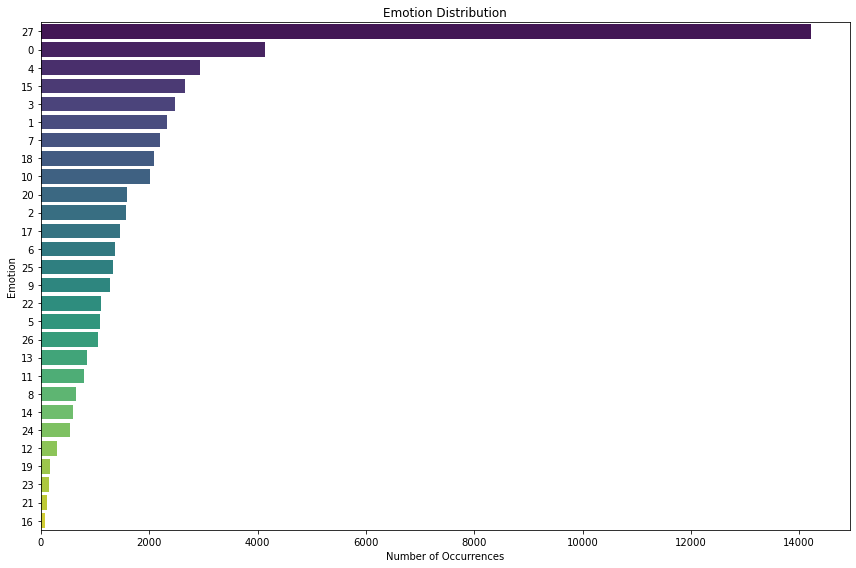

In [7]:
# Replace emotion IDs with the actual emtion names
emotion_names = emotion_ids.index.map(emotion_mapping)
emotion_distribution = pd.Series(emotion_ids.values, index=emotion_names) 

# plotting
plt.figure(figsize=(18, 7), dpi=150)
sns.barplot(x=emotion_distribution.index, y=emotion_distribution.values, palette="viridis")
plt.xlabel("Emotion")
plt.ylabel("Number of Occurrences")
plt.title("Distribution of Emotions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Text Length Distribution

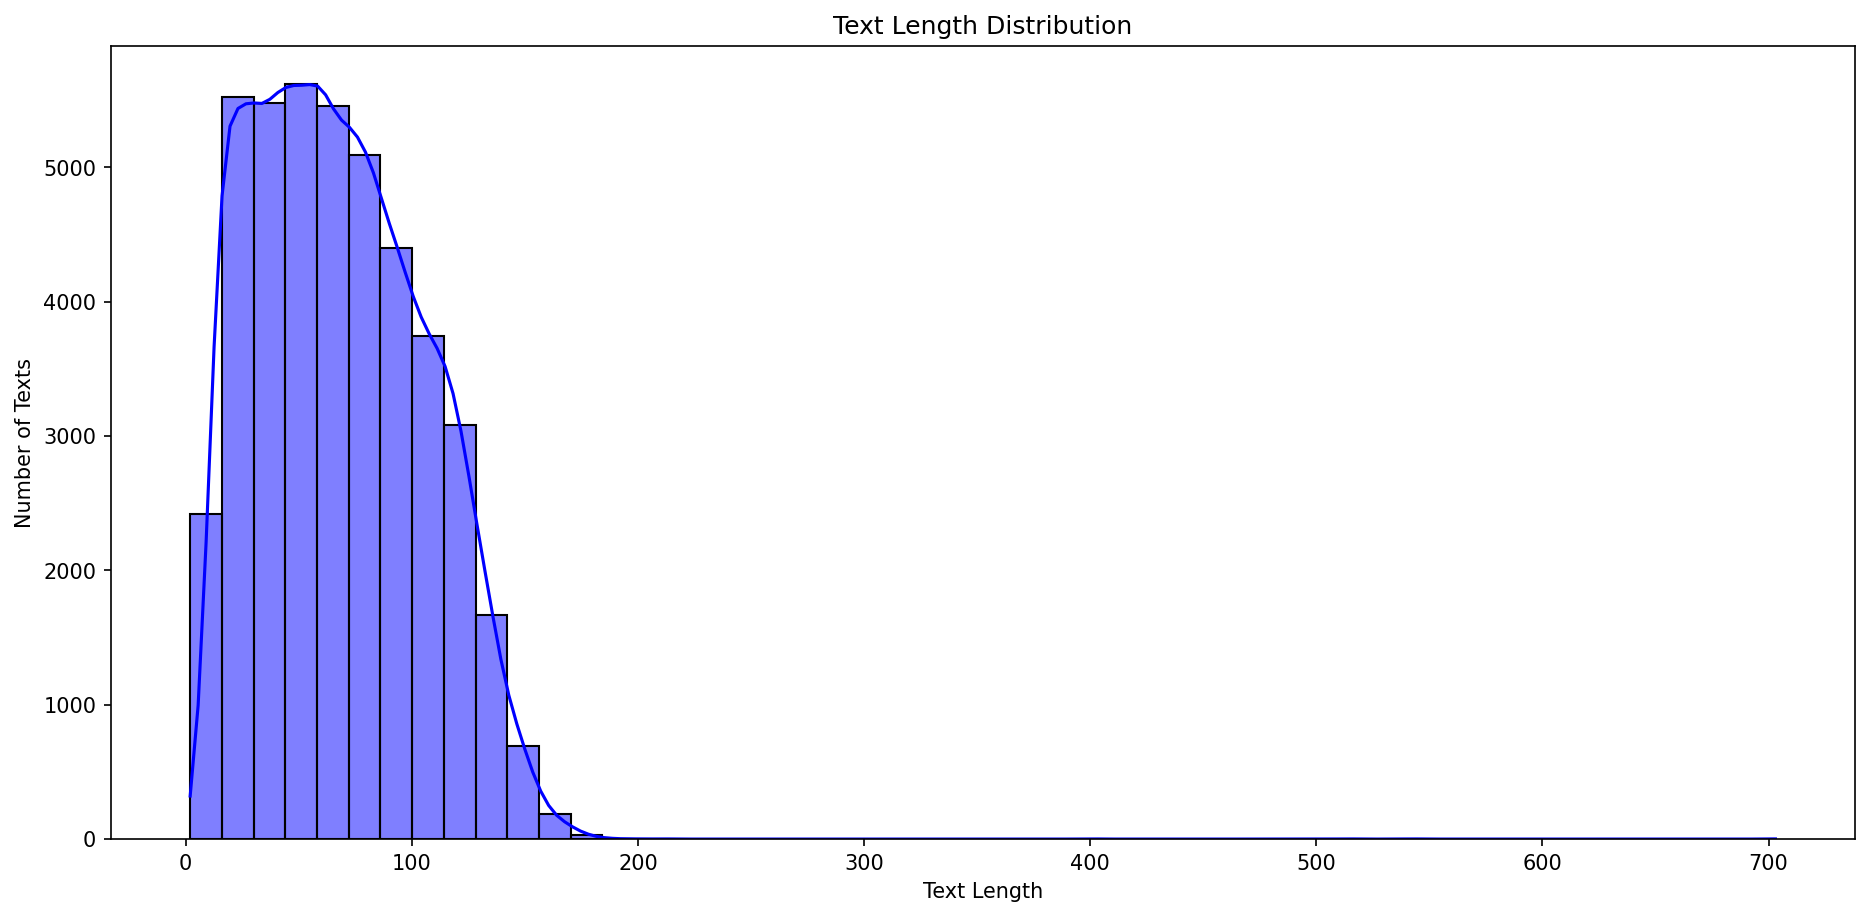

In [23]:
# Calculate text length for each entry
text_lengths = train_data['text'].apply(len)

# Plot the distribution of text lengths
plt.figure(figsize=(15, 7), dpi = 150)
sns.histplot(text_lengths, bins=50, color="blue", kde=True)
plt.xlabel("Text Length")
plt.ylabel("Number of Texts")
plt.title("Text Length Distribution")
plt.show()


## Word Cloud for the Entire Dataset 

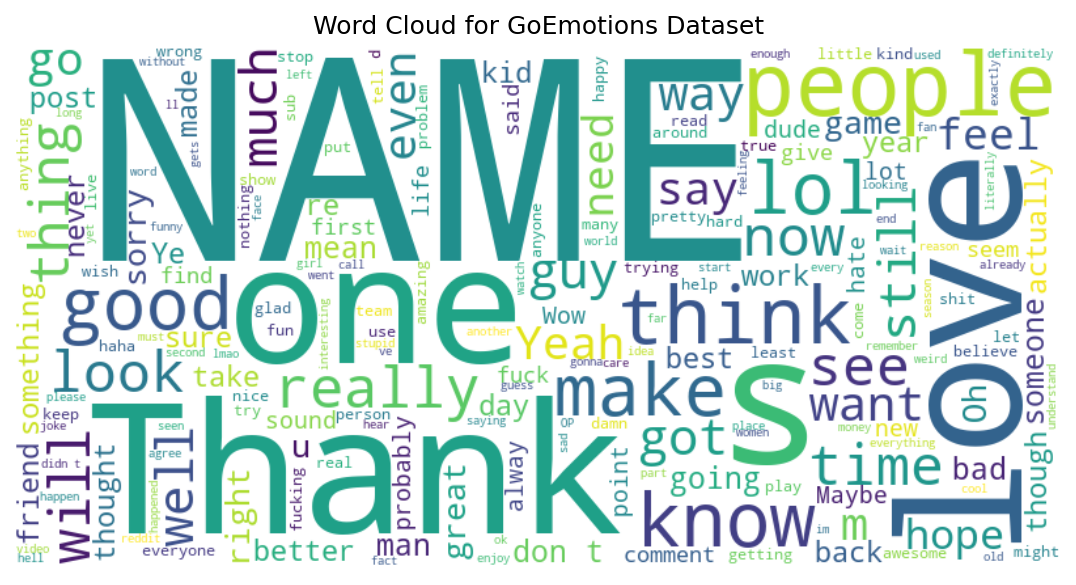

In [32]:
from wordcloud import WordCloud

# create a one large string of the entire text in the dataset 
combined_text = ' '.join(train_data['text'])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(combined_text)

plt.figure(figsize=(15, 4), dpi = 150)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for GoEmotions Dataset")
plt.tight_layout()
plt.show()
